# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Aida Kusuma Wardah
- **Email:** aidakusuma1331@gmail.com
- **ID Dicoding:** aiveth

## Menentukan Pertanyaan Bisnis



```
# Ini diformat sebagai kode
```

- Pertanyaan 1: Tipe anggota mana yang memiliki rata-rata peminjaman sepeda lebih tinggi, antara anggota casual yang tidak terdaftar dan anggota terdaftar?
- Pertanyaan 2: Apakah ada perbedaan yang signifikan dalam kontribusi peminjaman sepeda dari kedua tipe anggota ini?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from scipy.stats import iqr
from scipy.stats import ttest_ind

## Data Wrangling

### Gathering Data

In [ ]:
#membaca data dalam google drive
drive.mount('/content/drive')
day_df = pd.read_csv('/content/drive/My Drive/project/day.csv')
print("\nData Hari")
print(day_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Data Hari
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  

In [ ]:
hour_df = pd.read_csv('/content/drive/My Drive/project/hour.csv')
print("\nData Jam")
print(hour_df.head())


Data Jam
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


### Assessing Data

In [ ]:
day_df.info()
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

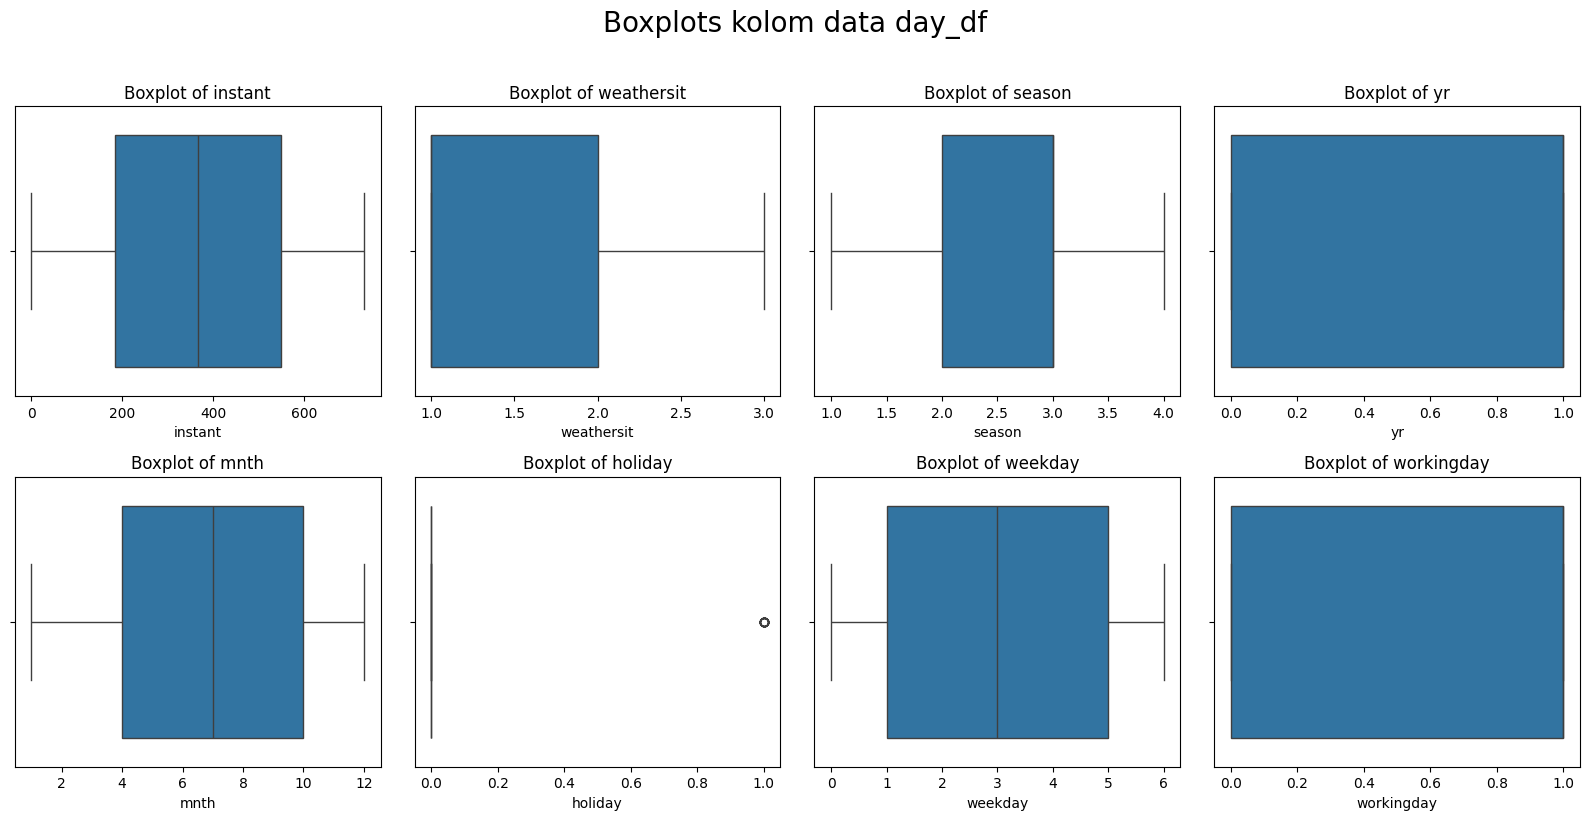

In [ ]:
# membuat visualisasi dengan boxplot
def boxplot_kolom(data, title):
    kolom = ['instant', 'weathersit', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday']
    plt.figure(figsize=(16, 8))

    for i, kolom in enumerate(kolom, 1):
        plt.subplot(2, 4, i)
        sns.boxplot(x=data[kolom])
        plt.title(f'Boxplot of {kolom}')

    plt.suptitle(title, y=1.02, fontsize=20)
    plt.tight_layout()
    plt.show()

boxplot_kolom(day_df, 'Boxplots kolom data day_df')


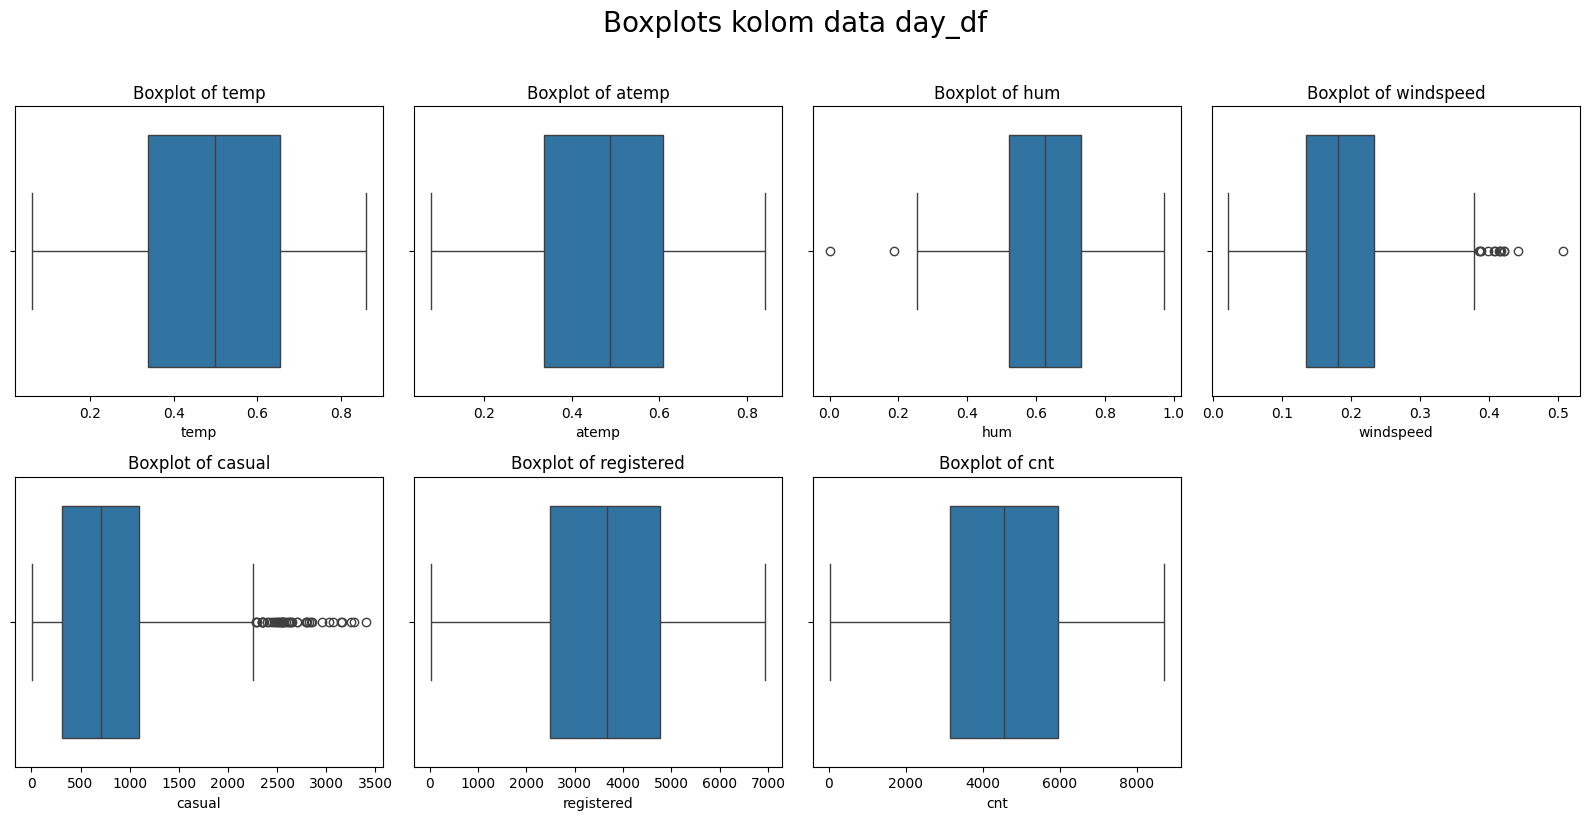

In [ ]:
# membuat visualisasi dengan boxplot
def boxplot_kolom(data, title):
    kolom = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
    plt.figure(figsize=(16, 8))

    for i, kolom in enumerate(kolom, 1):
        plt.subplot(2, 4, i)
        sns.boxplot(x=data[kolom])
        plt.title(f'Boxplot of {kolom}')

    plt.suptitle(title, y=1.02, fontsize=20)
    plt.tight_layout()
    plt.show()

boxplot_kolom(day_df, 'Boxplots kolom data day_df')


In [ ]:
hour_df.info()
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

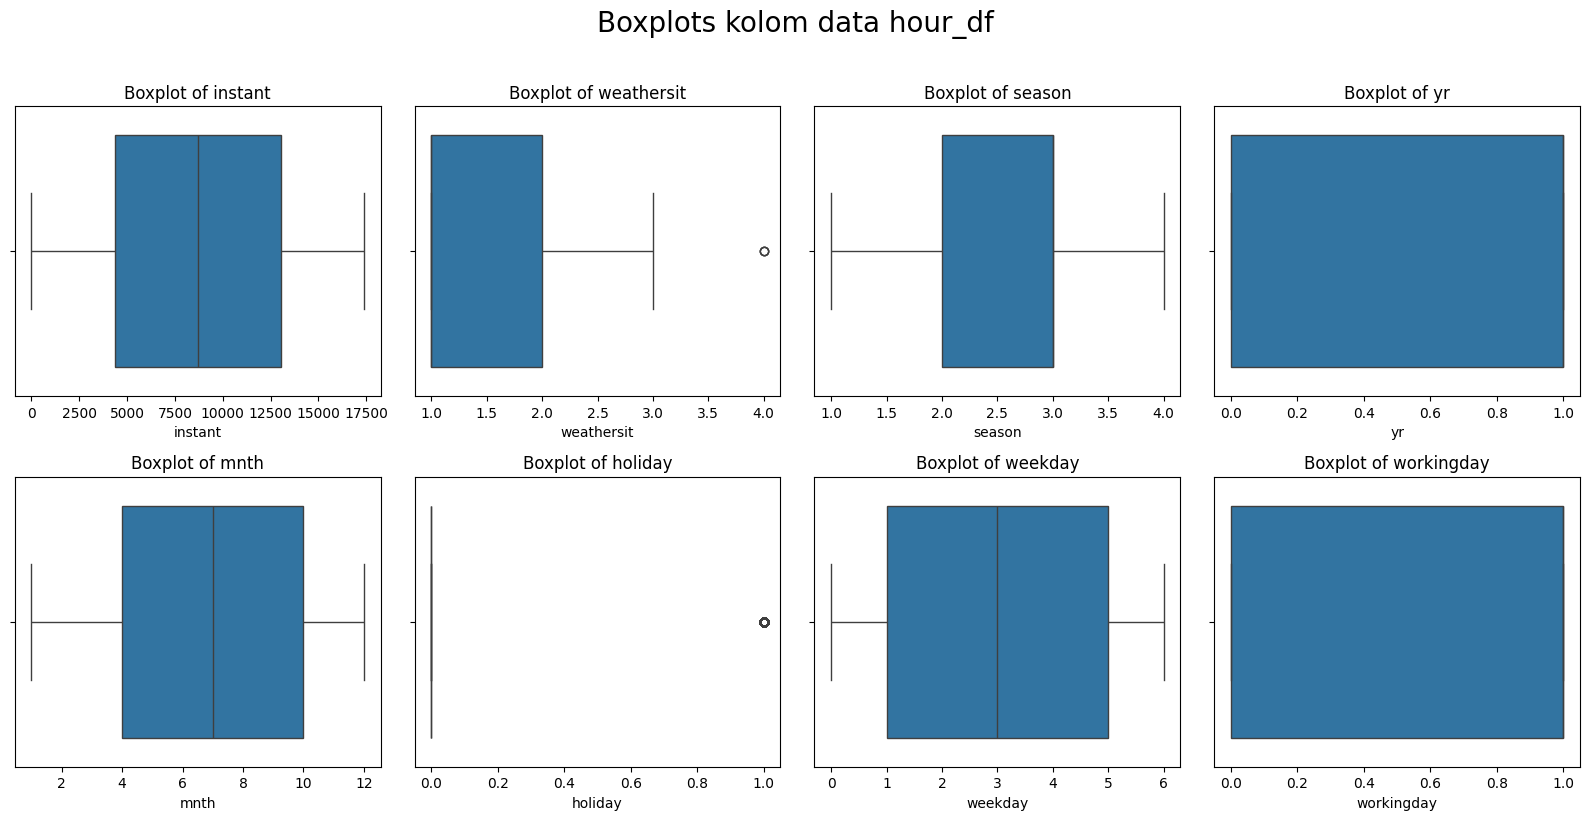

In [ ]:
# membuat visualisasi dengan boxplot
def boxplot_kolom(data, title):
    kolom = ['instant', 'weathersit', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday']
    plt.figure(figsize=(16, 8))

    for i, kolom in enumerate(kolom, 1):
        plt.subplot(2, 4, i)
        sns.boxplot(x=data[kolom])
        plt.title(f'Boxplot of {kolom}')

    plt.suptitle(title, y=1.02, fontsize=20)
    plt.tight_layout()
    plt.show()

boxplot_kolom(hour_df, 'Boxplots kolom data hour_df')


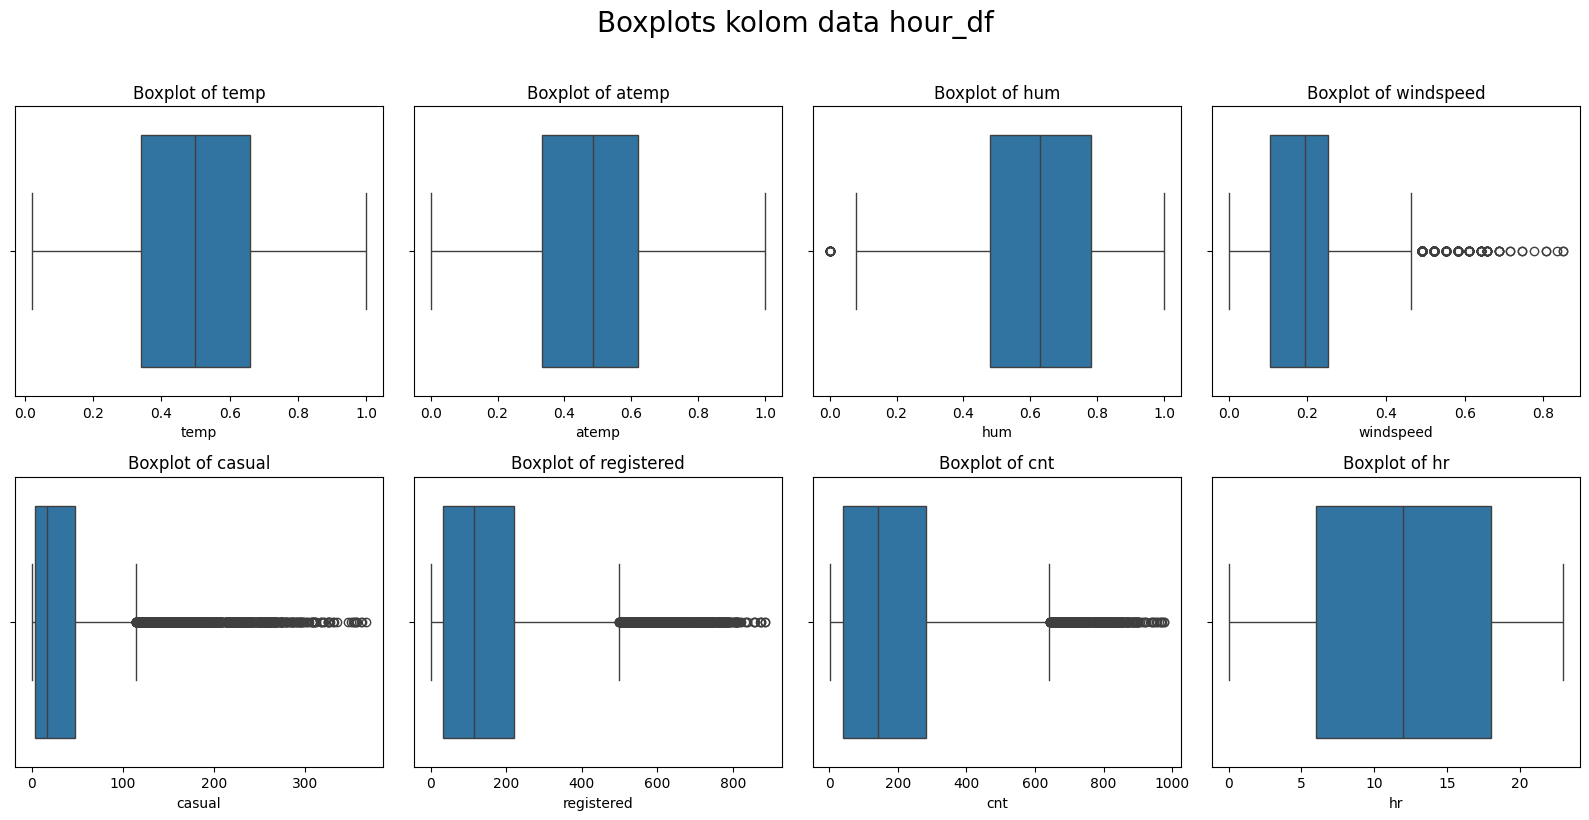

In [ ]:
# membuat visualisasi dengan boxplot
def boxplot_kolom(data, title):
    kolom = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'hr']
    plt.figure(figsize=(16, 8))

    for i, kolom in enumerate(kolom, 1):
        plt.subplot(2, 4, i)
        sns.boxplot(x=data[kolom])
        plt.title(f'Boxplot of {kolom}')

    plt.suptitle(title, y=1.02, fontsize=20)
    plt.tight_layout()
    plt.show()

boxplot_kolom(hour_df, 'Boxplots kolom data hour_df')


### Cleaning Data

In [ ]:
#mengubah tipe data dteday pada data day_df
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [ ]:
#menghapus nilai outlier pada data day_df kolom holiday
Q1 = (day_df['holiday']).quantile(0.25)
Q3 = (day_df['holiday']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = day_df['holiday'] < minimum
kondisi_more_than = day_df['holiday'] > maximum

day_df.drop(day_df[kondisi_lower_than].index, inplace=True)
day_df.drop(day_df[kondisi_more_than].index, inplace=True)

In [ ]:
#menghapus nilai outlier pada data day_df kolom hum
Q1 = (day_df['hum']).quantile(0.25)
Q3 = (day_df['hum']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = day_df['hum'] < minimum
kondisi_more_than = day_df['hum'] > maximum

day_df.drop(day_df[kondisi_lower_than].index, inplace=True)
day_df.drop(day_df[kondisi_more_than].index, inplace=True)

<ipython-input-69-dd331d6f9b0d>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  day_df.drop(day_df[kondisi_more_than].index, inplace=True)


In [ ]:
#menghapus nilai outlier pada data day_df kolom windspeed
Q1 = (day_df['windspeed']).quantile(0.25)
Q3 = (day_df['windspeed']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = day_df['windspeed'] < minimum
kondisi_more_than = day_df['windspeed'] > maximum

day_df.drop(day_df[kondisi_lower_than].index, inplace=True)
day_df.drop(day_df[kondisi_more_than].index, inplace=True)

In [ ]:
#menghapus nilai outlier pada data day_df kolom casual
Q1 = (day_df['casual']).quantile(0.25)
Q3 = (day_df['casual']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = day_df['casual'] < minimum
kondisi_more_than = day_df['casual'] > maximum

day_df.drop(day_df.loc[kondisi_lower_than].index, inplace=True)
day_df.drop(day_df.loc[kondisi_more_than].index, inplace=True)

In [ ]:
#menghapus nilai outlier pada data day_df kolom workingday
Q1 = (day_df['workingday']).quantile(0.25)
Q3 = (day_df['workingday']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = day_df['workingday'] < minimum
kondisi_more_than = day_df['workingday'] > maximum

day_df.drop(day_df.loc[kondisi_lower_than].index, inplace=True)
day_df.drop(day_df.loc[kondisi_more_than].index, inplace=True)

In [ ]:
#menghapus nilai outlier pada data hour_df kolom holiday
Q1 = (hour_df['holiday']).quantile(0.25)
Q3 = (hour_df['holiday']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = hour_df['holiday'] < minimum
kondisi_more_than = hour_df['holiday'] > maximum

hour_df.drop(hour_df[kondisi_lower_than].index, inplace=True)
hour_df.drop(hour_df[kondisi_more_than].index, inplace=True)

In [ ]:
#menghapus nilai outlier pada data hour_df kolom weathersit
Q1 = (hour_df['weathersit']).quantile(0.25)
Q3 = (hour_df['weathersit']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = hour_df['weathersit'] < minimum
kondisi_more_than = hour_df['weathersit'] > maximum

hour_df.drop(hour_df[kondisi_lower_than].index, inplace=True)
hour_df.drop(hour_df[kondisi_more_than].index, inplace=True)

In [ ]:
#menghapus nilai outlier pada data hour_df kolom hum
Q1 = (hour_df['hum']).quantile(0.25)
Q3 = (hour_df['hum']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = hour_df['hum'] < minimum
kondisi_more_than = hour_df['hum'] > maximum

hour_df.drop(hour_df[kondisi_lower_than].index, inplace=True)
hour_df.drop(hour_df[kondisi_more_than].index, inplace=True)

<ipython-input-75-8b1393bbfbd8>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hour_df.drop(hour_df[kondisi_more_than].index, inplace=True)


In [ ]:
#menghapus nilai outlier pada data hour_df kolom windspeed
Q1 = (hour_df['windspeed']).quantile(0.25)
Q3 = (hour_df['windspeed']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = hour_df['windspeed'] < minimum
kondisi_more_than = hour_df['windspeed'] > maximum

hour_df.drop(hour_df[kondisi_lower_than].index, inplace=True)
hour_df.drop(hour_df[kondisi_more_than].index, inplace=True)

In [ ]:
#menghapus nilai outlier pada data hour_df kolom casual
Q1 = (hour_df['casual']).quantile(0.25)
Q3 = (hour_df['casual']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = hour_df['casual'] < minimum
kondisi_more_than = hour_df['casual'] > maximum

hour_df.drop(hour_df.loc[kondisi_lower_than].index, inplace=True)
hour_df.drop(hour_df.loc[kondisi_more_than].index, inplace=True)

In [ ]:
#menghapus nilai outlier pada data hour_df kolom registered
Q1 = (hour_df['registered']).quantile(0.25)
Q3 = (hour_df['registered']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = hour_df['registered'] < minimum
kondisi_more_than = hour_df['registered'] > maximum

hour_df.drop(hour_df.loc[kondisi_lower_than].index, inplace=True)
hour_df.drop(hour_df.loc[kondisi_more_than].index, inplace=True)

In [ ]:
#menghapus nilai outlier pada data hour_df kolom cnt
Q1 = (hour_df['cnt']).quantile(0.25)
Q3 = (hour_df['cnt']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = hour_df['cnt'] < minimum
kondisi_more_than = hour_df['cnt'] > maximum

hour_df.drop(hour_df.loc[kondisi_lower_than].index, inplace=True)
hour_df.drop(hour_df.loc[kondisi_more_than].index, inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
day_df.describe(include="all", datetime_is_numeric=True)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,655.000000,655,655.000000,655.000000,655.000000,655.0,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.00000,655.000000,655.000000
mean,357.366412,2011-12-23 08:47:38.015267328,2.506870,0.474809,6.545038,0.0,2.993893,0.748092,1.407634,0.491363,0.470946,0.633358,0.186224,737.60000,3660.157252,4397.757252
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.059130,0.079070,0.275833,0.022392,2.00000,20.000000,22.000000
25%,174.500000,2011-06-23 12:00:00,1.500000,0.000000,3.500000,0.0,1.000000,0.000000,1.000000,0.330833,0.329850,0.524900,0.133721,303.50000,2506.500000,3129.000000
50%,348.000000,2011-12-14 00:00:00,3.000000,0.000000,7.000000,0.0,3.000000,1.000000,1.000000,0.485833,0.474117,0.630833,0.176625,684.00000,3643.000000,4456.000000
75%,544.500000,2012-06-27 12:00:00,3.000000,1.000000,10.000000,0.0,5.000000,1.000000,2.000000,0.653750,0.607960,0.734583,0.230723,1028.00000,4737.000000,5651.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,0.0,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.378108,2258.00000,6946.000000,8173.000000
std,211.948901,NaN,1.118184,0.499747,3.482684,0.0,1.929164,0.434441,0.550454,0.185020,0.164436,0.140990,0.072228,522.93126,1570.067857,1854.957213


In [ ]:
hour_df.describe(include="all", datetime_is_numeric=True)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14534.000000,14534,14534.000000,14534.000000,14534.000000,14534.000000,14534.0,14534.000000,14534.000000,14534.000000,14534.000000,14534.000000,14534.000000,14534.000000,14534.000000,14534.000000,14534.000000
unique,NaN,709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8411.118274,NaN,2.485620,0.473442,6.503991,11.093987,0.0,3.025320,0.730081,1.447571,0.480886,0.462204,0.646501,0.179655,23.193409,118.755883,141.949291
std,5028.054496,NaN,1.122709,0.499311,3.508679,7.170394,0.0,1.962749,0.443933,0.649648,0.190324,0.170164,0.188437,0.111894,26.106143,104.852767,122.131159
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4070.250000,NaN,1.000000,0.000000,3.000000,5.000000,0.0,1.000000,0.000000,1.000000,0.320000,0.318200,0.500000,0.104500,3.000000,27.000000,32.000000
50%,8229.500000,NaN,2.000000,0.000000,7.000000,11.000000,0.0,3.000000,1.000000,1.000000,0.480000,0.469700,0.650000,0.164200,12.000000,98.000000,117.000000
75%,12716.750000,NaN,3.000000,1.000000,10.000000,18.000000,0.0,5.000000,1.000000,2.000000,0.640000,0.606100,0.810000,0.253700,36.000000,179.000000,223.000000


## Visualization & Explanatory Analysis

array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>],
       [<Axes: title={'center': 'mnth'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

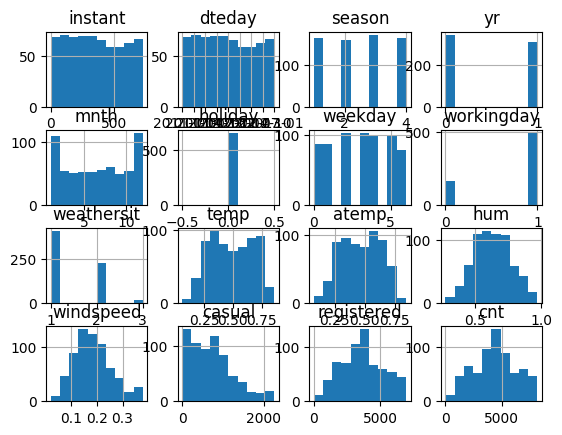

In [ ]:
day_df.hist()

In [ ]:
day_df.groupby(by="registered").mean()

<ipython-input-83-585ddbe0dcb0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day_df.groupby(by="registered").mean()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt
registered,,,,,,,,,,,,,,
20,668.0,4.0,1.0,10.0,0.0,1.0,1.0,3.0,0.440000,0.439400,0.880000,0.358200,2.0,22.0
416,27.0,1.0,0.0,1.0,0.0,4.0,1.0,1.0,0.195000,0.219700,0.687500,0.113837,15.0,431.0
432,726.0,1.0,1.0,12.0,0.0,3.0,1.0,3.0,0.243333,0.220333,0.823333,0.316546,9.0,441.0
451,359.0,1.0,0.0,12.0,0.0,0.0,0.0,1.0,0.274783,0.279961,0.681304,0.155091,303.0,754.0
472,26.0,1.0,0.0,1.0,0.0,3.0,1.0,3.0,0.217500,0.203600,0.862500,0.293850,34.0,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6844,642.0,4.0,1.0,10.0,0.0,3.0,1.0,2.0,0.657500,0.599133,0.793750,0.066546,728.0,7572.0
6898,663.0,4.0,1.0,10.0,0.0,3.0,1.0,1.0,0.587500,0.558721,0.636250,0.072779,795.0,7693.0
6911,649.0,4.0,1.0,10.0,0.0,3.0,1.0,1.0,0.514167,0.503142,0.630833,0.187821,780.0,7691.0


In [ ]:
day_df.corr()

<ipython-input-84-2760edc27d1d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  day_df.corr()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.423212,0.864518,0.504277,NaN,-0.027249,0.080280,-0.001964,0.140781,0.141839,0.009151,-0.114509,0.227655,0.670650,0.631828
season,0.423212,1.000000,0.003731,0.839091,NaN,-0.002816,0.024027,0.026496,0.333221,0.339713,0.181502,-0.203860,0.243452,0.411860,0.417237
yr,0.864518,0.003731,1.000000,0.003947,NaN,-0.036638,0.086932,-0.032095,0.033617,0.031788,-0.110134,-0.024545,0.177644,0.601134,0.558890
mnth,0.504277,0.839091,0.003947,1.000000,NaN,0.009827,0.010037,0.052223,0.222481,0.228247,0.204952,-0.187569,0.150238,0.307063,0.302257
holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,-0.027249,-0.002816,-0.036638,0.009827,NaN,1.000000,0.047421,0.041225,-0.008496,-0.018233,-0.029050,0.003430,0.021973,0.027234,0.029246
workingday,0.080280,0.024027,0.086932,0.010037,NaN,0.047421,1.000000,0.027235,0.107320,0.104958,0.002691,-0.007398,-0.431230,0.364703,0.187123
weathersit,-0.001964,0.026496,-0.032095,0.052223,NaN,0.041225,0.027235,1.000000,-0.121588,-0.123781,0.633273,0.076357,-0.289828,-0.267669,-0.308265
temp,0.140781,0.333221,0.033617,0.222481,NaN,-0.008496,0.107320,-0.121588,1.000000,0.991311,0.110187,-0.132950,0.589474,0.542021,0.624954
atemp,0.141839,0.339713,0.031788,0.228247,NaN,-0.018233,0.104958,-0.123781,0.991311,1.000000,0.122516,-0.159931,0.587671,0.544191,0.626283


array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>, <Axes: title={'center': 'mnth'}>],
       [<Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

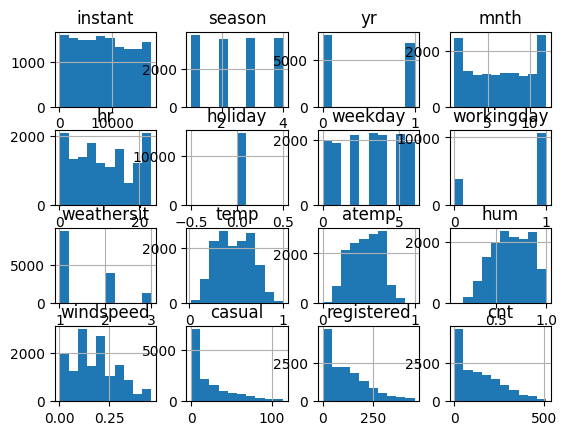

In [ ]:
hour_df.hist()

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,655.000000,655.000000,655.000000,655.000000,655.0,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.00000,655.000000,655.000000
mean,357.366412,2.506870,0.474809,6.545038,0.0,2.993893,0.748092,1.407634,0.491363,0.470946,0.633358,0.186224,737.60000,3660.157252,4397.757252
std,211.948901,1.118184,0.499747,3.482684,0.0,1.929164,0.434441,0.550454,0.185020,0.164436,0.140990,0.072228,522.93126,1570.067857,1854.957213
min,1.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.059130,0.079070,0.275833,0.022392,2.00000,20.000000,22.000000
25%,174.500000,1.500000,0.000000,3.500000,0.0,1.000000,0.000000,1.000000,0.330833,0.329850,0.524900,0.133721,303.50000,2506.500000,3129.000000
50%,348.000000,3.000000,0.000000,7.000000,0.0,3.000000,1.000000,1.000000,0.485833,0.474117,0.630833,0.176625,684.00000,3643.000000,4456.000000
75%,544.500000,3.000000,1.000000,10.000000,0.0,5.000000,1.000000,2.000000,0.653750,0.607960,0.734583,0.230723,1028.00000,4737.000000,5651.000000
max,731.000000,4.000000,1.000000,12.000000,0.0,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.378108,2258.00000,6946.000000,8173.000000


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14534.000000,14534.000000,14534.000000,14534.000000,14534.000000,14534.0,14534.000000,14534.000000,14534.000000,14534.000000,14534.000000,14534.000000,14534.000000,14534.000000,14534.000000,14534.000000
mean,8411.118274,2.485620,0.473442,6.503991,11.093987,0.0,3.025320,0.730081,1.447571,0.480886,0.462204,0.646501,0.179655,23.193409,118.755883,141.949291
std,5028.054496,1.122709,0.499311,3.508679,7.170394,0.0,1.962749,0.443933,0.649648,0.190324,0.170164,0.188437,0.111894,26.106143,104.852767,122.131159
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4070.250000,1.000000,0.000000,3.000000,5.000000,0.0,1.000000,0.000000,1.000000,0.320000,0.318200,0.500000,0.104500,3.000000,27.000000,32.000000
50%,8229.500000,2.000000,0.000000,7.000000,11.000000,0.0,3.000000,1.000000,1.000000,0.480000,0.469700,0.650000,0.164200,12.000000,98.000000,117.000000
75%,12716.750000,3.000000,1.000000,10.000000,18.000000,0.0,5.000000,1.000000,2.000000,0.640000,0.606100,0.810000,0.253700,36.000000,179.000000,223.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,0.0,6.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.462700,114.000000,455.000000,512.000000


In [ ]:
casual_data = day_df['casual']
registered_data = day_df['registered']
t_statistic, p_value = ttest_ind(casual_data, registered_data)
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

T-Statistic: -45.198262528937214
P-Value: 1.811800189354899e-269


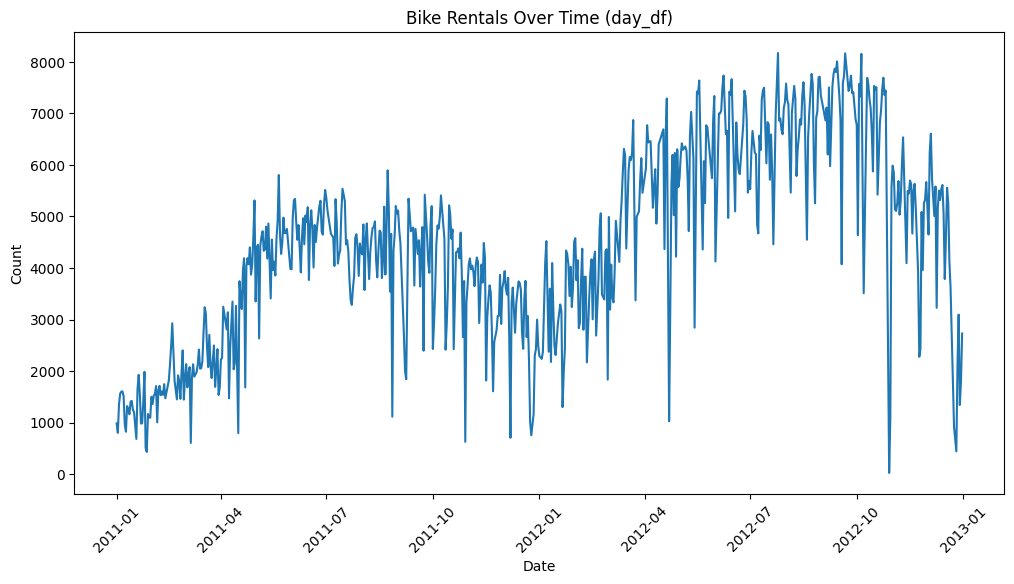

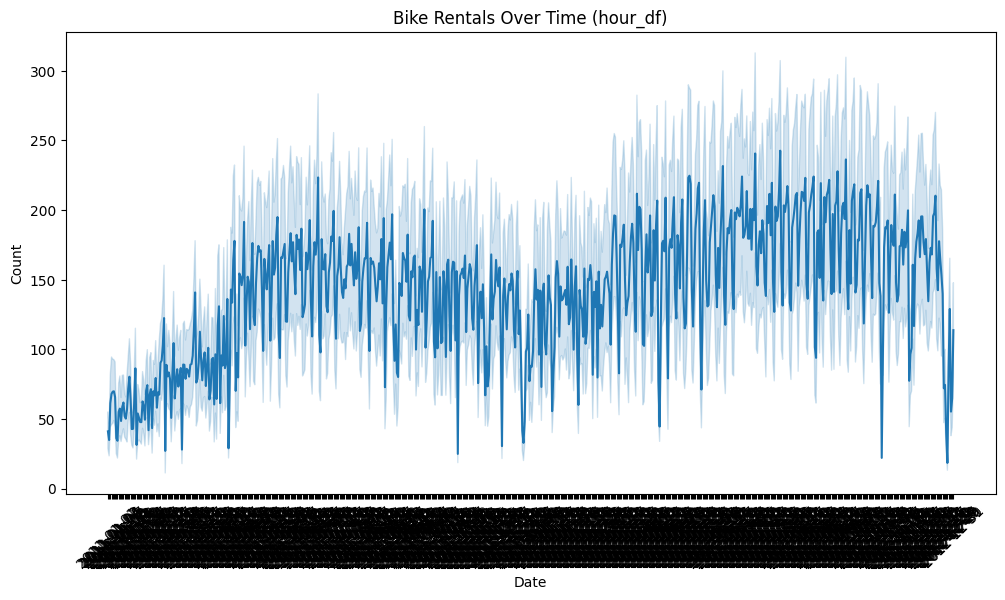

In [ ]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='dteday', y='cnt', data=day_df)
plt.title('Bike Rentals Over Time (day_df)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt', data=hour_df)
plt.title('Bike Rentals Over Time (hour_df)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

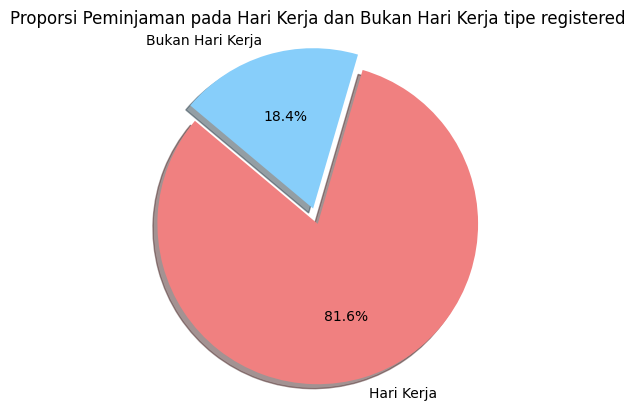

In [ ]:
total_registered_workingday = day_df.loc[day_df['workingday'] == 1, 'registered'].sum()
total_registered_non_workingday = day_df.loc[day_df['workingday'] == 0, 'registered'].sum()

labels = ['Hari Kerja', 'Bukan Hari Kerja']
sizes = [total_registered_workingday, total_registered_non_workingday]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Proporsi Peminjaman pada Hari Kerja dan Bukan Hari Kerja tipe registered')
plt.show()

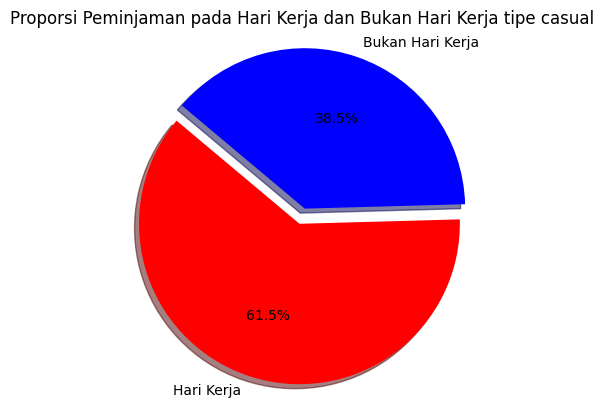

In [ ]:
total_casual_workingday = day_df.loc[day_df['workingday'] == 1, 'casual'].sum()
total_casual_non_workingday = day_df.loc[day_df['workingday'] == 0, 'casual'].sum()

labels = ['Hari Kerja', 'Bukan Hari Kerja']
sizes = [total_casual_workingday, total_casual_non_workingday]
colors = ['red', 'blue']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Proporsi Peminjaman pada Hari Kerja dan Bukan Hari Kerja tipe casual')
plt.show()

### Pertanyaan 1:

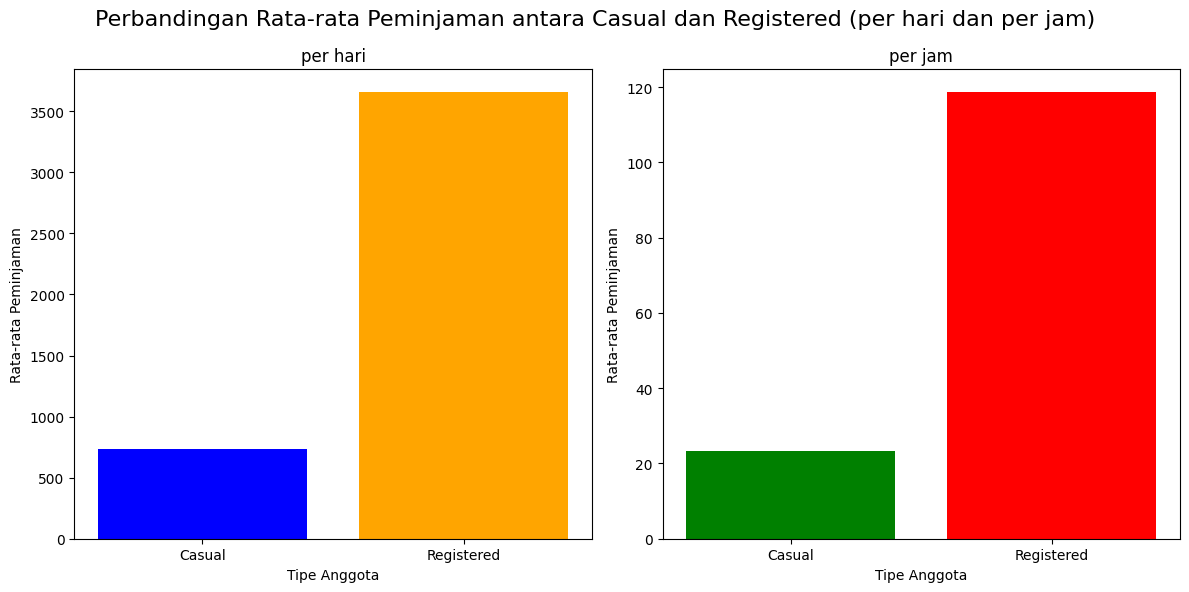

In [ ]:
casual_data_day = day_df['casual']
registered_data_day = day_df['registered']
mean_casual_day = casual_data_day.mean()
mean_registered_day = registered_data_day.mean()

casual_data_hour = hour_df['casual']
registered_data_hour = hour_df['registered']
mean_casual_hour = casual_data_hour.mean()
mean_registered_hour = registered_data_hour.mean()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].bar(['Casual', 'Registered'], [mean_casual_day, mean_registered_day], color=['blue', 'orange'])
axes[0].set_xlabel('Tipe Anggota')
axes[0].set_ylabel('Rata-rata Peminjaman')
axes[0].set_title('per hari')
axes[1].bar(['Casual', 'Registered'], [mean_casual_hour, mean_registered_hour], color=['green', 'red'])
axes[1].set_xlabel('Tipe Anggota')
axes[1].set_ylabel('Rata-rata Peminjaman')
axes[1].set_title('per jam')
plt.suptitle('Perbandingan Rata-rata Peminjaman antara Casual dan Registered (per hari dan per jam)', fontsize=16)
plt.tight_layout()
plt.show()

### Pertanyaan 2:

T-Statistic: 45.198262528937214
P-Value: 1.811800189354899e-269
Perbedaan signifikan, tolak H0


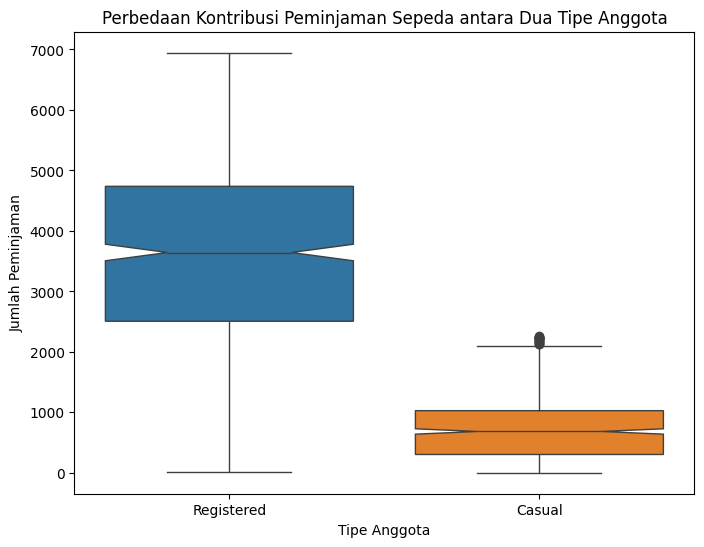

In [ ]:
registered_data = day_df['registered']
casual_data = day_df['casual']

# Melakukan uji t
t_statistic, p_value = ttest_ind(registered_data, casual_data)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("Perbedaan signifikan, tolak H0")
else:
    print("Tidak ada bukti untuk menolak H0")

# Dengan keterangan
# Hipotesis Nol (H0): Tidak ada perbedaan signifikan dalam kontribusi peminjaman sepeda antara dua tipe anggota.
# Hipotesis Alternatif (H1): Ada perbedaan signifikan dalam kontribusi peminjaman sepeda antara dua tipe anggota.
# Visualisasi dengan Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=[registered_data, casual_data], notch=True)
plt.xticks([0, 1], ['Registered', 'Casual'])
plt.title('Perbedaan Kontribusi Peminjaman Sepeda antara Dua Tipe Anggota')
plt.xlabel('Tipe Anggota')
plt.ylabel('Jumlah Peminjaman')
plt.show()

## Conclusion

- Terlihat dari grafik bahwa peminjam yang sudah ter-registrasi lebih banyak meminjam dibandingkan casual, baik per hari maupun per jam. Dalam hal ini berarti perlunya strategi pemasaran lebih lanjut untuk menarik banyak peminjam casual.
- P-Value > alpha maka H0 ditolak dan H1 diterima, dengan kesimpulan bahwa ada perbedaan signifikan dalam kontribusi peminjaman sepeda antara tipe registered dan casual. Dalam hal ini bisa memperkuat atau memberi layanan tambahan kepada peminjam tipe registered untuk mempertahankan kontribusi mereka.